# Suction Anchor Capacity – Jupyter Notebook

### Step 1: Import required libraries

We begin by importing the essential modules:

- `Anchor` from `famodel.anchors.anchor`: the main class that encapsulates the suction anchor's capacity methods - soil properties, anchor geometry and extreme loads.
- `plot_suction` from `famodel.anchors.anchors_famodel.capacity_plots`: a custom plotting utility that visualizes anchor geometry and soil properties.

These imports set up the environment to define, simulate, and visualize the anchor system.

In [1]:
from famodel.anchors.anchor import Anchor
from famodel.anchors.anchors_famodel.support_plots import plot_suction

### Step 2: Define the layered soil profile map
We create a list of CPT locations in the vertices of a 500x500 m square within the Lease Area, each with a set of layered clay soil parameters.

In [2]:
profile_map = [
    {
        'name': 'CPT_A1',
        'x': 0.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top':  10, 'Su_bot':  25},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top':  25, 'Su_bot':  50},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.5, 'Su_top':  50, 'Su_bot': 100},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.5, 'gamma_bot': 9.5, 'Su_top': 100, 'Su_bot': 100}
        ]
    },
    {
        'name': 'CPT_B1',
        'x': 500.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top':  8.5, 'gamma_bot':  9.0, 'Su_top':  15, 'Su_bot':  30},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  30, 'Su_bot':  55},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  55, 'Su_bot': 105},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.0, 'Su_top': 105, 'Su_bot': 105}
        ]
    },
    {
        'name': 'CPT_A2',
        'x': 0.0, 'y': 500.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 7.5, 'gamma_bot': 8.0, 'Su_top':  5, 'Su_bot': 20},
            {'top':  4.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top': 20, 'Su_bot': 45},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top': 45, 'Su_bot': 95},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.0, 'Su_top': 95, 'Su_bot': 95}
        ]
    },
    {
        'name': 'CPT_B2',
        'x': 500.0, 'y': 500.0,
        'layers': [
            {'top':  1.0, 'bottom':  2.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  20, 'Su_bot':  35},
            {'top':  2.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  35, 'Su_bot':  60},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.5, 'Su_top':  60, 'Su_bot': 110},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.5, 'gamma_bot': 10.5, 'Su_top': 110, 'Su_bot': 110}
        ]
    }
]

### Step 3: Initialize the anchor object
We define a suction anchor with its type, initial geometry and anchor location within the defined area.

In [3]:
anchor = Anchor(
    dd = {'type': 'suction', 'design': {'D': 2.5, 'L': 12.0, 'zlug': 8.67}},
    r = [250.0, 250.0, 0.0]
)
print('zlug:', anchor.dd['design']['zlug'])
print('L:', anchor.dd['design']['L'])


zlug: 8.67
L: 12.0


### Step 4: Assign soil profile to anchor location
This connects the anchor object to the appropriate CPT soil data based on proximity.

In [4]:
anchor.interpolateSoilProfile(profile_map)
print('zlug:', anchor.dd['design']['zlug'])
print('L:', anchor.dd['design']['L'])


zlug: 8.67
L: 12.0


### Step 5: Plot suction anchor and soil profile
We represent a suction anchor embedded in the soil.

zlug: 8.67
L: 12.0
{'soil_type': 'clay', 'top': 1.75, 'bottom': 3.5, 'gamma_top': 8.25, 'gamma_bot': 8.75, 'Su_top': 12.5, 'Su_bot': 27.5}


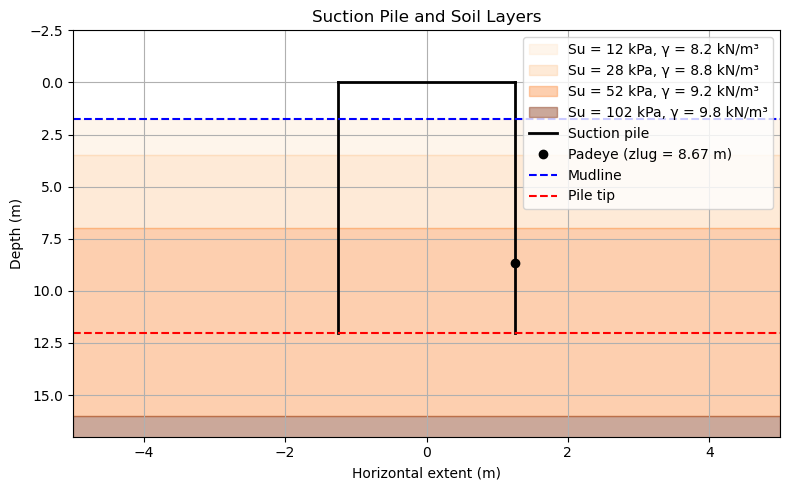

In [15]:
# Access anchor geometrical properties
L = anchor.dd['design']['L']
D = anchor.dd['design']['D']
zlug = anchor.dd['design']['zlug']
print('zlug:', anchor.dd['design']['zlug'])
print('L:', anchor.dd['design']['L'])
# Access matched profile
layers = anchor.soil_profile[0]['layers']
print(layers[0])
z0 = layers[0]['top']  

plot_suction(layers, L=L, D=D, z0=z0, zlug=zlug)



### Step 6: Assign external loads and line properties
We assign horizontal and vertical loads and specify the mooring line type and its physical properties (nominal diameter and weight (N/m)).

In [16]:
anchor.loads = {
    'Hm': 3e6,
    'Vm': 2e6
}
anchor.line_type = 'chain'
anchor.d = 0.16
anchor.w = 5000.0


### Step 7: Compute lug forces
We compute the forces acting at the lug using load, geometry, and soil interaction. 

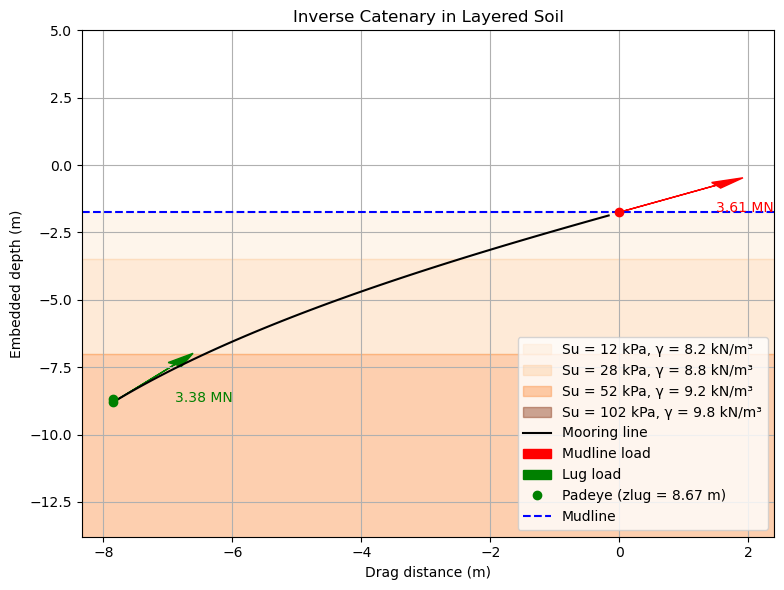


Lug Forces Computed:
Ha = 1904935.43 N
Va = 2787196.16 N


In [17]:
layers, Ha, Va = anchor.getLugForces(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nLug Forces Computed:')
print(f'Ha = {Ha:.2f} N')
print(f'Va = {Va:.2f} N')

### Step 8: Compute the anchor capacity
This checks whether the current anchor design meets load requirements. Results and plots are printed for reference.

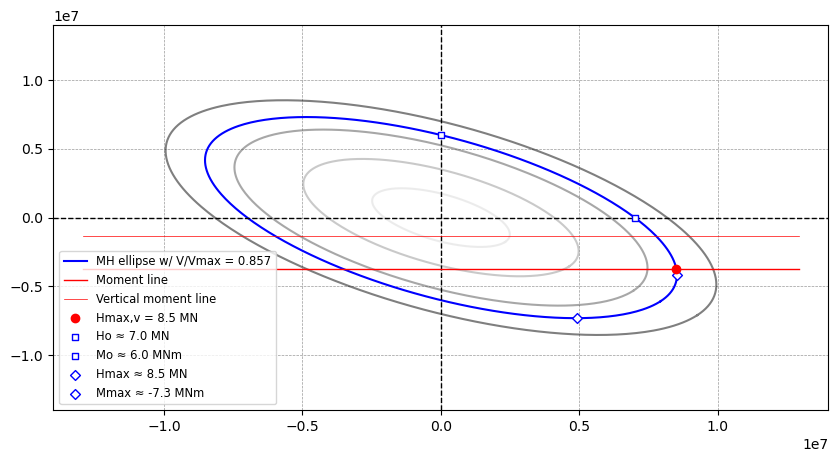

<Figure size 600x500 with 0 Axes>

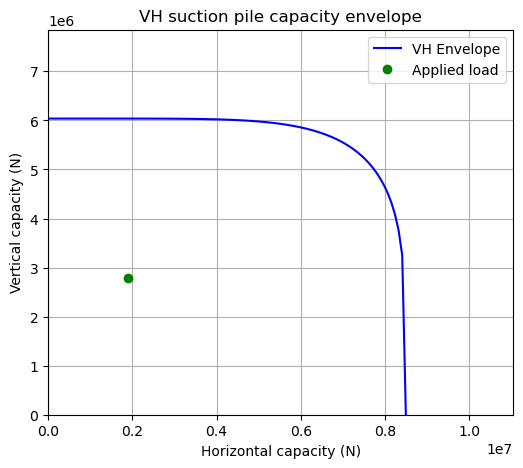


Capacity Results:
Hmax: 8496895.31
Vmax: 6037871.08
Ha: 1904935.43
Va: 2787196.16
zlug: 8.67
z0: 1.75
UC: 0.01
Weight pile: 457496.77
Initial mass from dd: Not defined


In [18]:
anchor.getCapacityAnchor(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nCapacity Results:')
for key, value in anchor.anchorCapacity.items():
    print(f'{key}: {value:.2f}')
print('Initial mass from dd:', anchor.dd['design'].get('mass', 'Not defined'))

### Step 9: Anchor material costs
We assess the cost of the suction pile defined by the manufacturing cost (USD/kg)

In [20]:
anchor.getCost()

print(f"Mass: {anchor.anchorCapacity['Weight pile']/9.81:.2f} kg")
print(f"Material unit cost: {anchor.cost['unit_cost']:.2f} USD/kg")
print(f'Material cost: {anchor.cost["Material cost"]:.2f} USD [2024]')


Mass: 46635.76 kg
Material unit cost: 10.25 USD/kg
Material cost: 478016.50 USD [2024]


### Step 10: Optimize anchor geometry
We optimize anchor length and diameter to ensure capacity requirements are met efficiently within given bounds. Note that a safety factor (SF_combined) = 2 is used in this optimization process. This means that the unity check (UC = 1/SF) equals 0.5. This way the design can accept some extra capacity based on input preference.

[Debug] Anchor type parsed: 'suction'


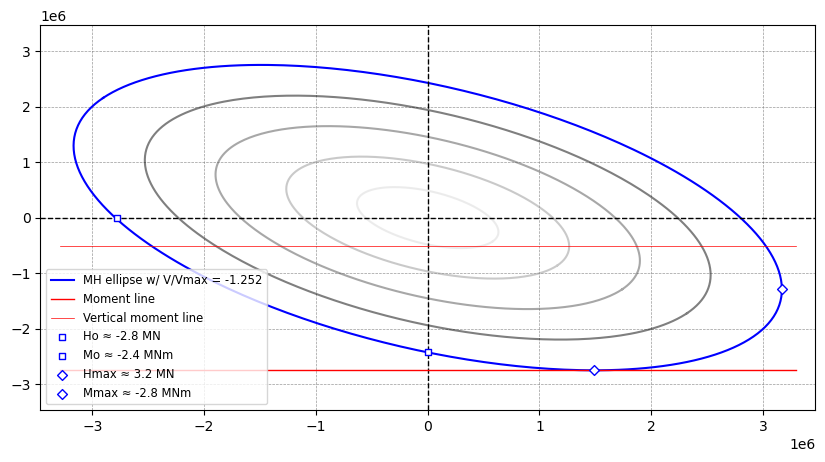

<Figure size 600x500 with 0 Axes>

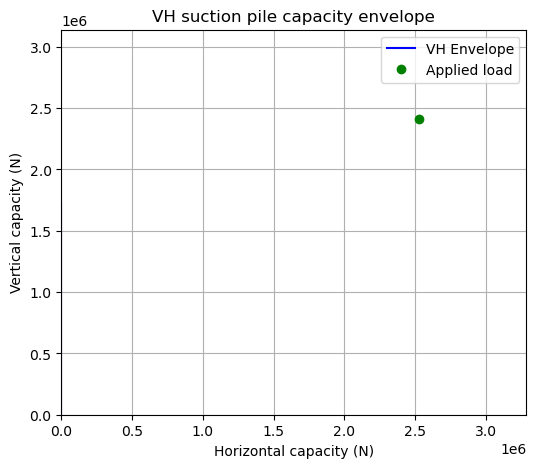


Final Optimized Anchor (UC-based):
Design: {'D': 1.427702436403329, 'L': 8.565624503775082, 'zlug': 5.710416335850054}
Capacity Results: {'Hmax': 0.1, 'Vmax': 1719845.4215692256, 'Ha': 2528247.4234612333, 'Va': 2414423.5137604806, 'zlug': 5.710416335850054, 'z0': 1.75, 'UC': 1.0997495198266297e+39, 'Weight pile': 114372.69697445678}

Final Optimized Anchor:
Design: {'D': 1.427702436403329, 'L': 8.565624503775082, 'zlug': 5.710416335850054}
Capacity Results: {'Hmax': 0.1, 'Vmax': 1719845.4215692256, 'Ha': 2528247.4234612333, 'Va': 2414423.5137604806, 'zlug': 5.710416335850054, 'z0': 1.75, 'UC': 1.0997495198266297e+39, 'Weight pile': 114372.69697445678}


In [21]:
anchor.getSizeAnchor(
    geom = [anchor.dd['design']['L'], anchor.dd['design']['D']],
    geomKeys = ['L', 'D'],
    geomBounds = [(5.0, 15.0), (1.0, 4.0)],
    loads = None,
    lambdap_con = [3, 6],
    zlug_fix = False,
    safety_factor = {'SF_combined': 2},
    plot = True
)

print('\nFinal Optimized Anchor:')
print('Design:', anchor.dd['design'])
print('Capacity Results:', anchor.anchorCapacity)

### Step 11: Optimized anchor material costs
We assess the cost of the optimized suction pile defined by the manufacturing cost (USD/kg)

In [23]:
anchor.getCost()

print(f"Mass: {anchor.anchorCapacity['Weight pile']/9.81:.2f} kg")
print(f"Material unit cost: {anchor.cost['unit_cost']:.2f} USD/kg")
print(f'Material cost: {anchor.cost["Material cost"]:.2f} USD [2024]')

Mass: 11658.79 kg
Material unit cost: 10.25 USD/kg
Material cost: 119502.56 USD [2024]
